## Problem Statement

- You are provided with bunch of parameter and you have to tell wether someone would click on the given ads or not


## Import statements


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_df = pd.read_csv("advertising.csv")
data_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Descriptive Data Analysis


In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [15]:
data_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Cleaning the Data


<Axes: >

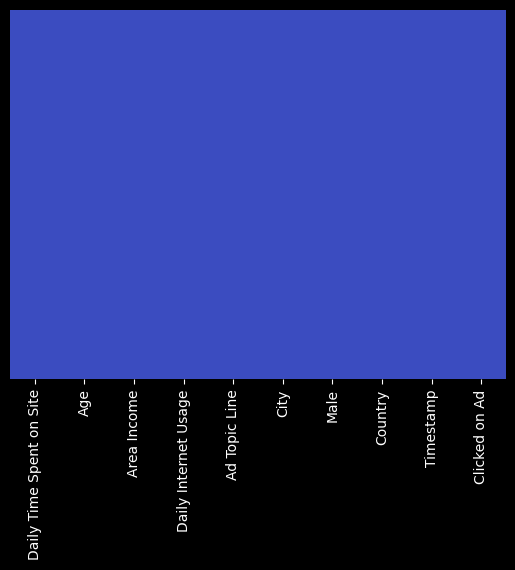

In [4]:
sns.heatmap(
    data=data_df.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="coolwarm",
)

## Getting the correlation amoung the columns of dataset


<Axes: >

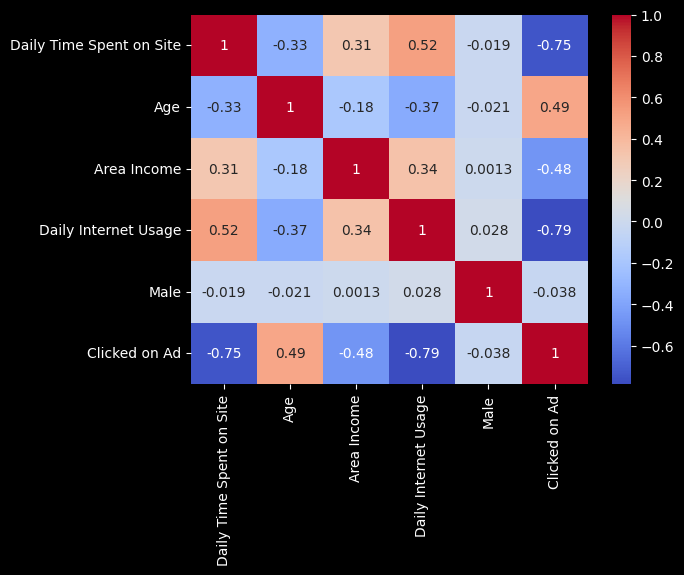

In [6]:
numeric_data_df = data_df.select_dtypes(include=[int, float])
sns.heatmap(
    data=numeric_data_df.corr(),
    cmap="coolwarm",
    annot=True,
)

### Relation b/w the Age and clicked on ad

#### Conclusion

- The conclusion is this ratio of clicked on ad increase when the age is around 30 to 40 y/o


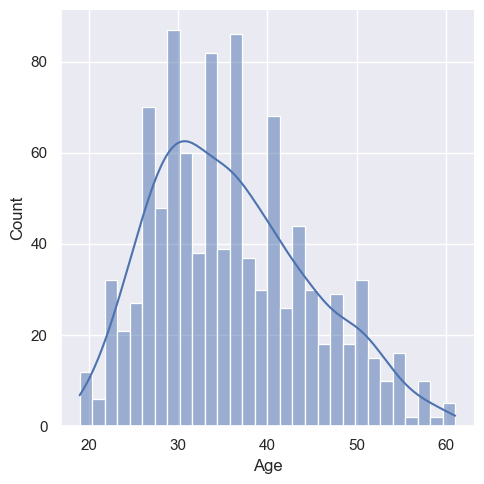

In [12]:
sns.set_theme("notebook")
sns.displot(
    data=data_df,
    x="Age",
    bins=30,
    kde=True,
)

### Relation b/w the age and area income


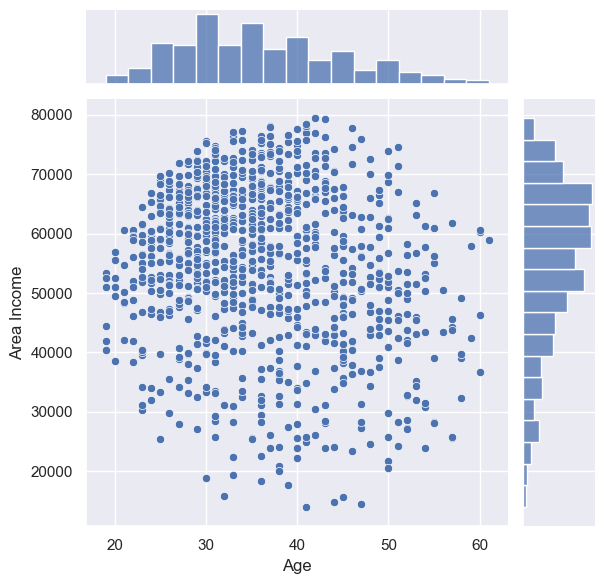

In [16]:
sns.jointplot(
    data=data_df,
    x="Age",
    y="Area Income",
)

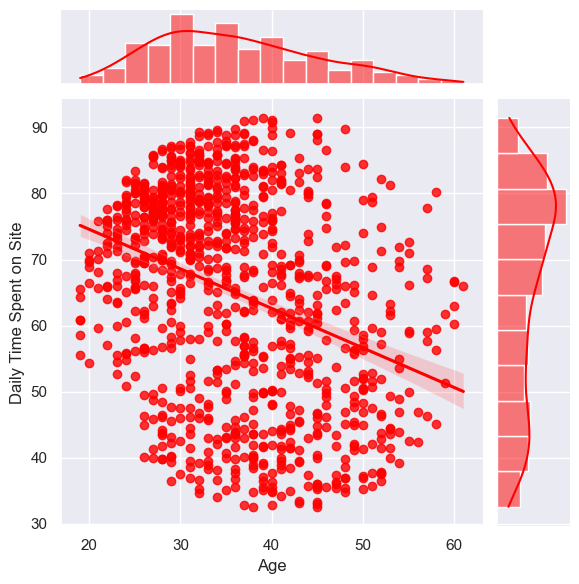

In [21]:
sns.jointplot(
    data=data_df, x="Age", y="Daily Time Spent on Site", color="red", kind="reg"
)

### Relation b/w the daily time spent on site vs Daily internet usage


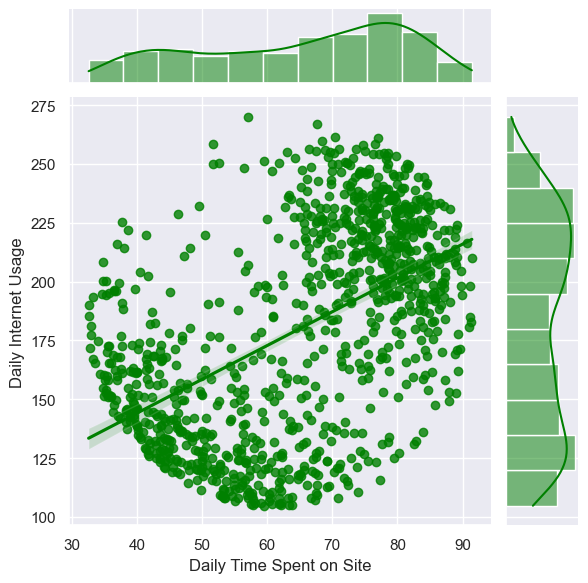

In [28]:
sns.jointplot(
    data=data_df,
    x="Daily Time Spent on Site",
    y="Daily Internet Usage",
    color="green",
    kind="reg",
)

plt.show()

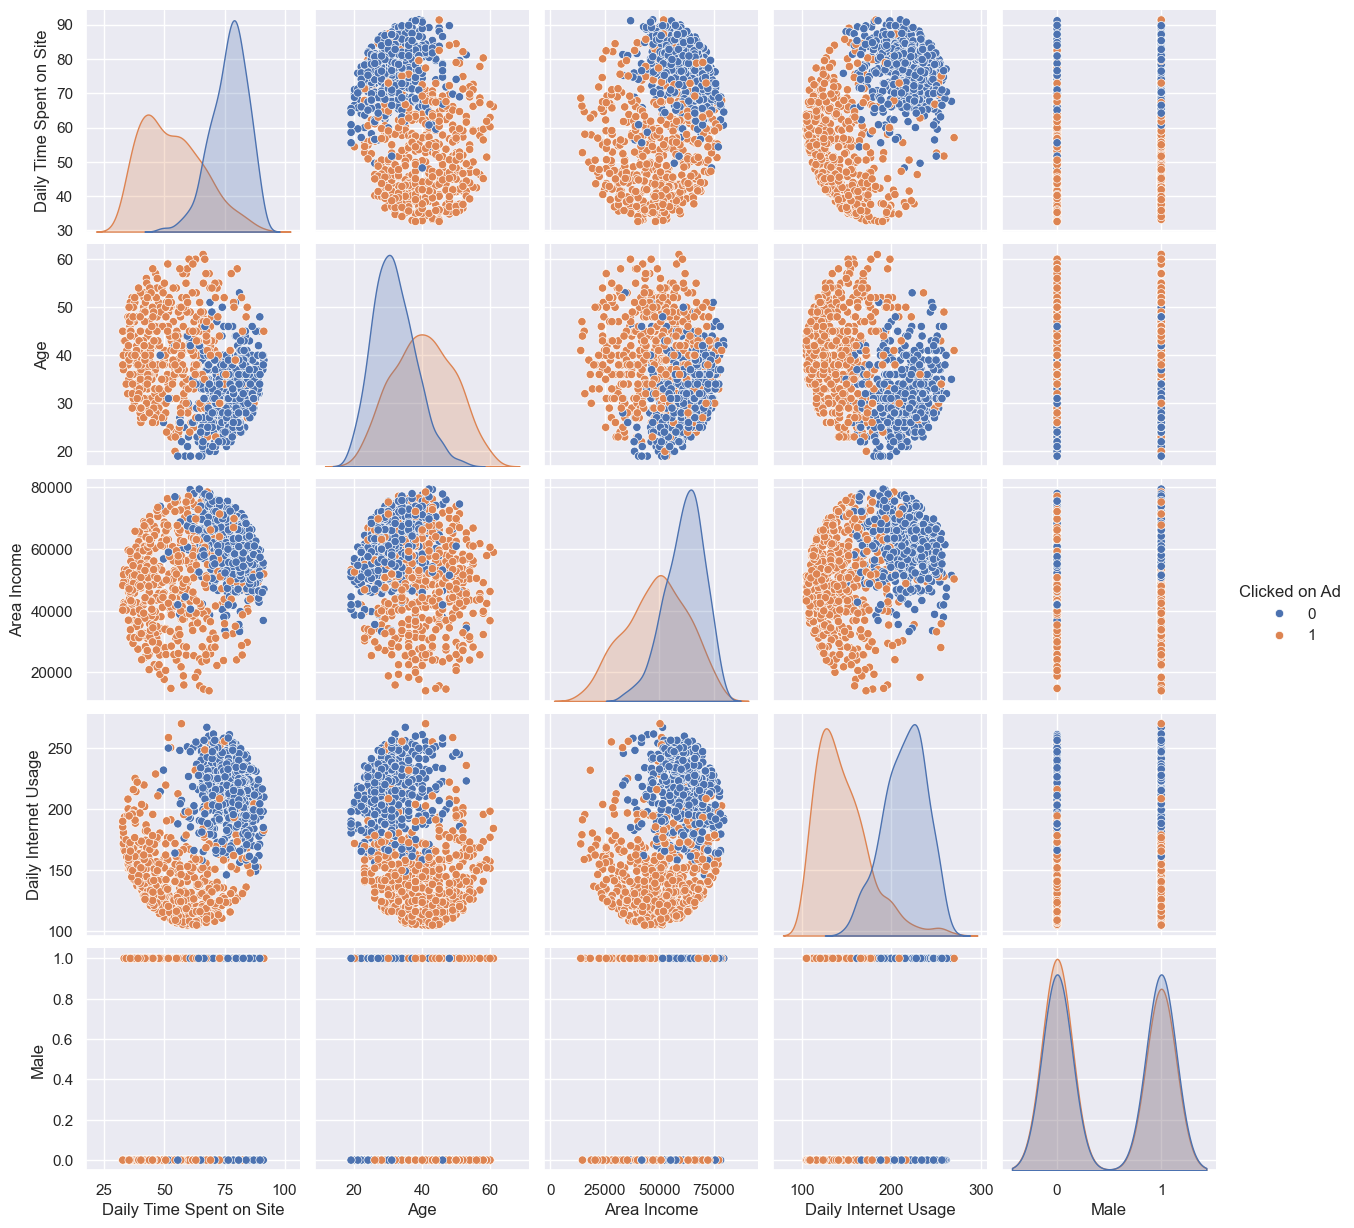

In [29]:
sns.pairplot(
    data=data_df,
    hue="Clicked on Ad",
)

plt.show()

## Creating Logistic Regression Models


In [31]:
data_df

features = data_df[
    [
        "Daily Time Spent on Site",
        "Age",
        "Area Income",
        "Daily Internet Usage",
        "Male",
    ]
]

target = data_df["Clicked on Ad"]

In [45]:
features_Train, features_test, target_Train, target_test = train_test_split(
    features,
    target,
    test_size=0.9,
    random_state=101,
)

In [46]:
print(features_Train.shape)
print(features_test.shape)
print(target_Train.shape)
print(target_test.shape)

(100, 5)
(900, 5)
(100,)
(900,)


In [47]:
log_model = LogisticRegression()
log_model.fit(features_Train, target_Train)

c:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
predictions = log_model.predict(features_test)

In [49]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       453
           1       0.94      0.87      0.91       447

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900

